In [4]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

<h2> Part 1: Familiarizing ourself with the data, creating heat maps</h2>

We will start our analysis simply by becoming familiar with the data set at hand, creating heat maps, and then finally by evaluating various metrics to compoare similarity of two different players based upon their heat maps. We will then plan to see if these similarity measurements can prove useful within the framework of transfer strategy, even if only used as one consideration in a wider net of analytical strategies. 

In [5]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

In [6]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id, season id
#competition_id=55, season_id=282
all_matches_df = sb.matches(competition_id=2, season_id=27)

#print the first 5 matches listed
all_matches_df.head(5)



,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [7]:
#create a variable for the team you want to look into
team="Leicester City"

#filter for only matches that the focus team played in
matches_df = all_matches_df[(all_matches_df['home_team'] == team)|(all_matches_df['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [8]:
matches_df.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
309,3754229,2016-05-15,16:00:00.000,England - Premier League,2015/2016,Chelsea,Leicester City,1,1,available,...,2021-06-12T16:17:31.694,38,Regular Season,Stamford Bridge,Craig Pawson,Guus Hiddink,Claudio Ranieri,1.1.0,2,2
224,3754033,2016-05-07,18:30:00.000,England - Premier League,2015/2016,Leicester City,Everton,3,1,available,...,2021-06-12T16:17:31.694,37,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Roberto Martínez Montoliú,1.1.0,2,2
278,3754165,2016-05-01,15:05:00.000,England - Premier League,2015/2016,Manchester United,Leicester City,1,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Old Trafford,Michael Oliver,Louis van Gaal,Claudio Ranieri,1.1.0,2,2
308,3754228,2016-04-24,17:15:00.000,England - Premier League,2015/2016,Leicester City,Swansea City,4,0,available,...,2021-06-12T16:17:31.694,35,Regular Season,King Power Stadium,Mark Clattenburg,Claudio Ranieri,Francesco Guidolin,1.1.0,2,2
307,3754227,2016-04-17,14:30:00.000,England - Premier League,2015/2016,Leicester City,West Ham United,2,2,available,...,2021-06-12T16:17:31.694,34,Regular Season,King Power Stadium,Jonathan Moss,Claudio Ranieri,Slaven Bilić,1.1.0,2,2


In [9]:
latest_match_id = matches_df.match_id.iloc[0]

events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head(5)

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Chelsea,33,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Leicester City,22,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Leicester City,22,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Chelsea,33,00:00:00.000,Half Start,NaN


In [10]:
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

events_df.pass_outcome.unique()

#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

player1="Jamie Vardy"
player2="Wes Morgan"
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]

f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

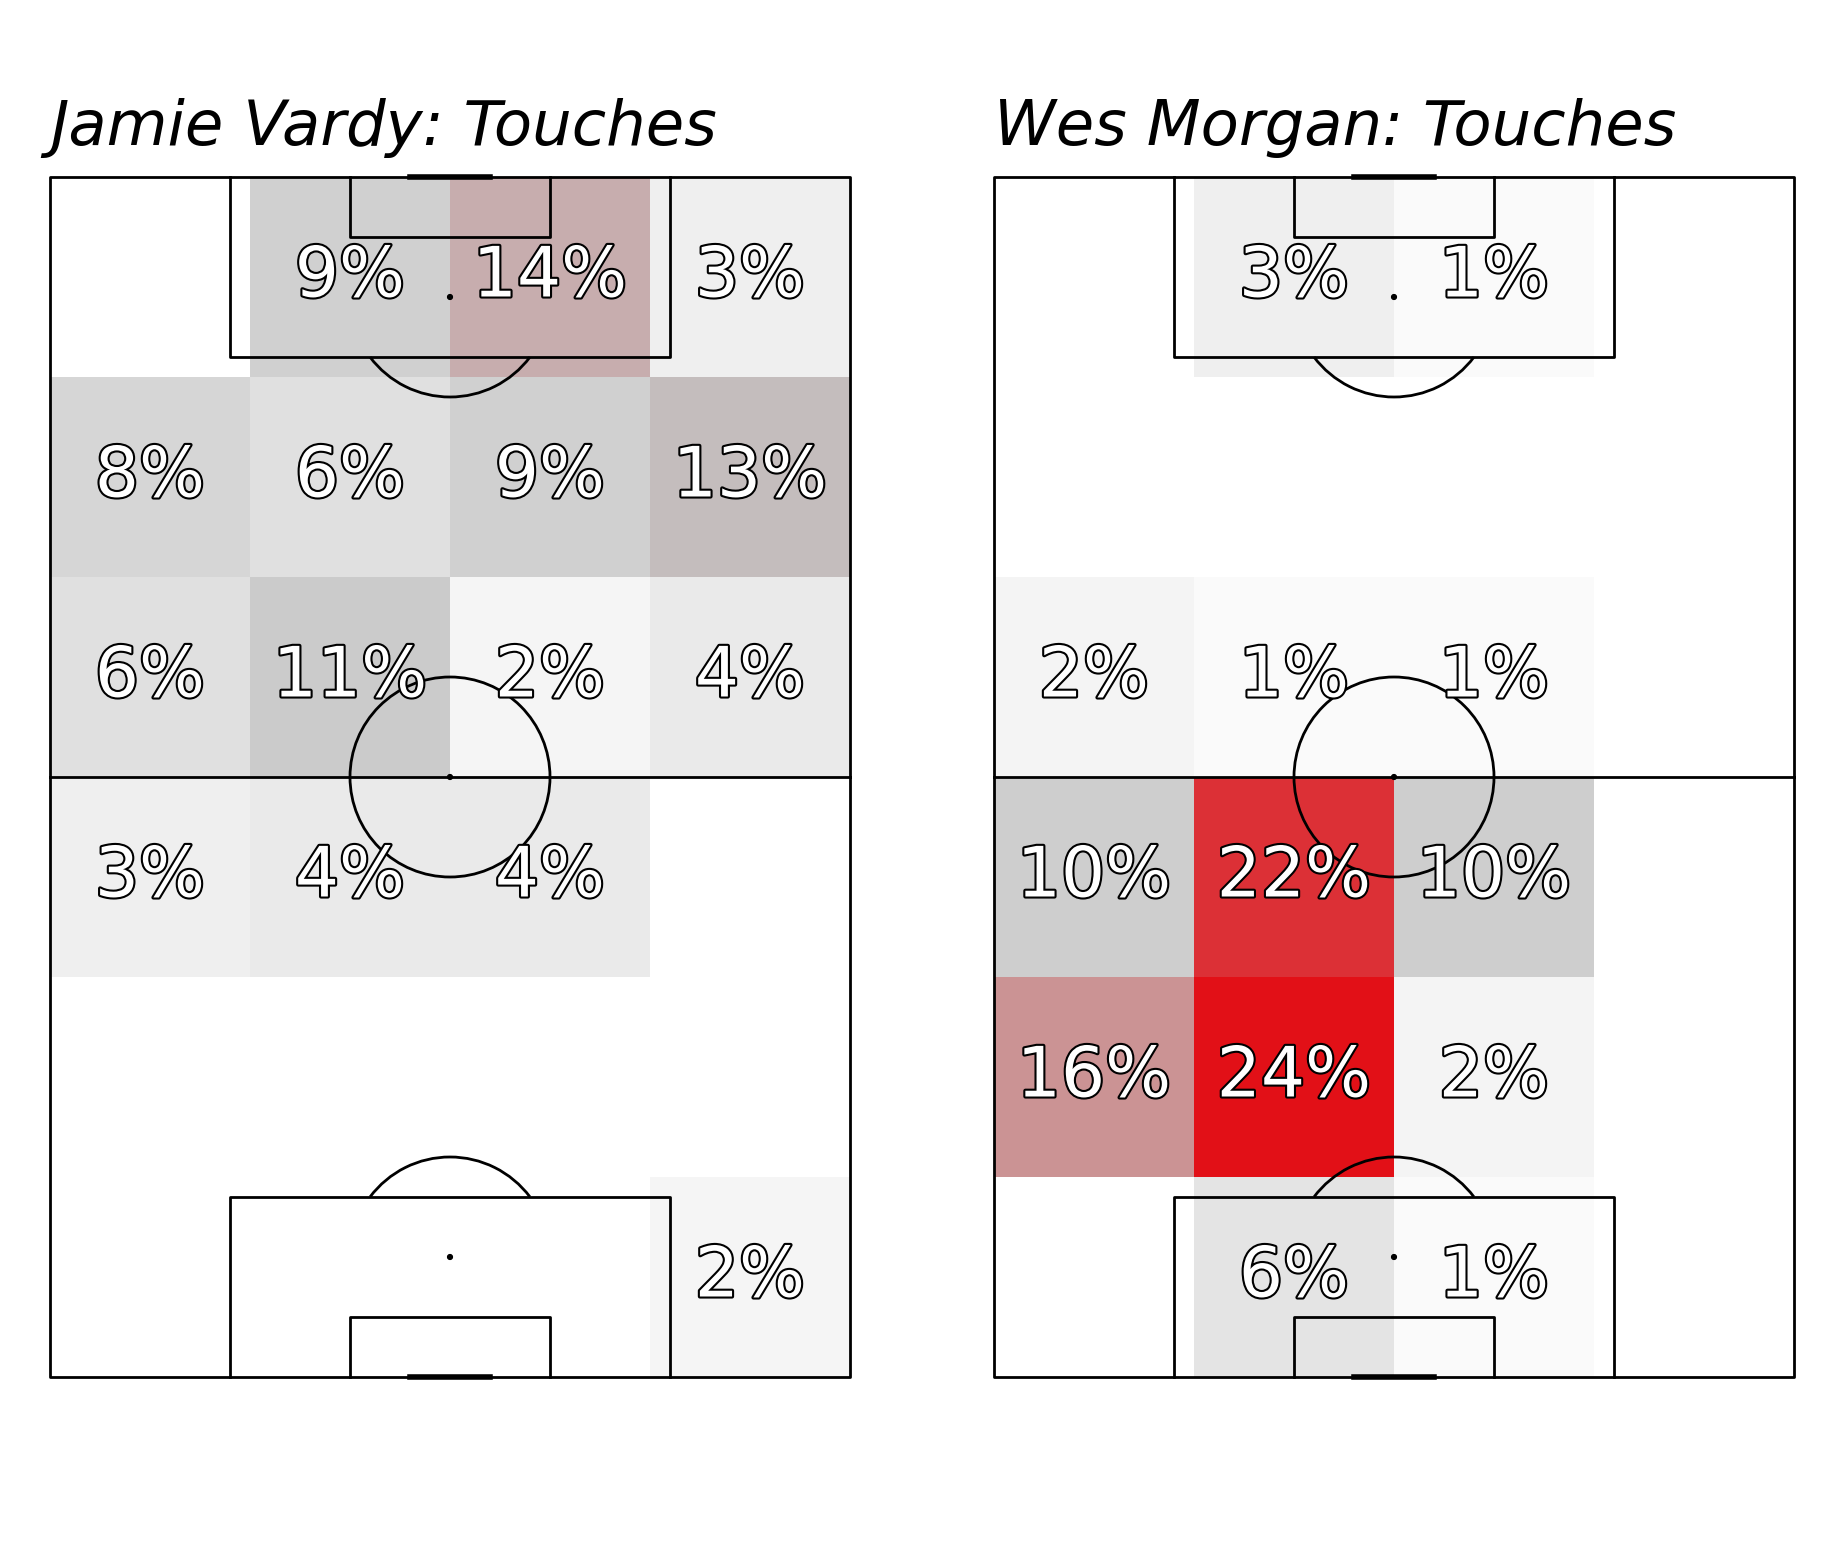

In [11]:
#create colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)


path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

<h1> Potential Metrics to Compare Players based on Heatmaps: </h1>

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

H1 = bin_statistic1['statistic'].ravel().reshape(1, -1)
H2 = bin_statistic2['statistic'].ravel().reshape(1, -1)

cos_sim = cosine_similarity(H1, H2)[0][0]
print(f'Cosine Similarity: {cos_sim:.3f}')

#cosine similarity measures the similarity of the shape of distribution
#so tells us something about playstyle really 
#do twomplayers that play similar positions take up similar positions?
#could be useful to evaluate player replacements 
#especially if looking not just at touches,
#but at things like where players take their shots during a season. 

Cosine Similarity: 0.206


In [13]:
from scipy.stats import wasserstein_distance

# Normalize heatmaps
H1 = bin_statistic1['statistic']
H2 = bin_statistic2['statistic']
P = H1 / H1.sum()
Q = H2 / H2.sum()

# Flatten and generate location grid
x, y = np.meshgrid(np.arange(P.shape[1]), np.arange(P.shape[0]))
positions = np.vstack([x.ravel(), y.ravel()]).T

# Compute distance between distributions at these grid points
emd = wasserstein_distance(P.ravel(), Q.ravel())
print(f'Earth Mover\'s Distance: {emd:.3f}')

#good for evaluating overlap between players 
#you want players with decently high earth movers distances 
#as otherwise thye may take up spaces that are too similar 
#and thus get in each others ways 
#would require further analysis on 

Earth Mover's Distance: 0.022


In [14]:
#this statistic also measures percentage overlap
#looking for a lower value overall when comparing players that play in similar positions
# so as to look for players that do not get in each other way. 

threshold = 0.05 # 5% of total activity
mask1 = (bin_statistic1['statistic'] > threshold)
mask2 = (bin_statistic2['statistic'] > threshold)

intersection = np.logical_and(mask1, mask2).sum()
union = np.logical_or(mask1, mask2).sum()

jaccard_index = intersection / union
print(f'Jaccard Index (Zone Overlap): {jaccard_index:.3f}')

#as you can see, wes morgan being a center back, and jamie vardy being a striker 
#they do not overlao very much at all, which is to be expected. 

Jaccard Index (Zone Overlap): 0.000


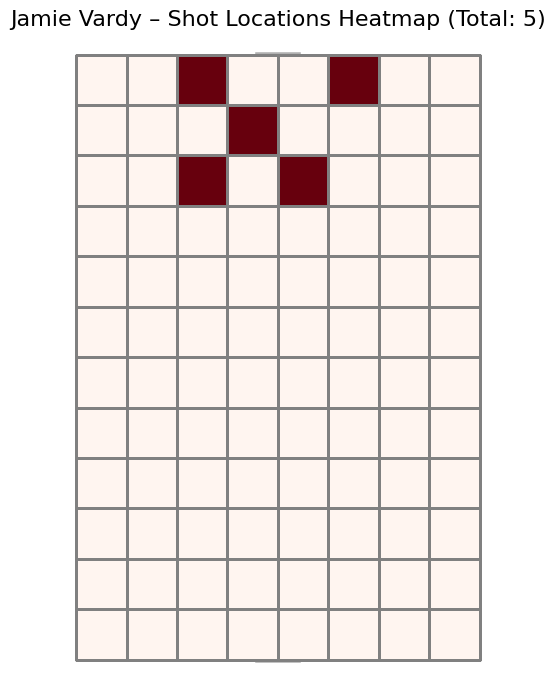

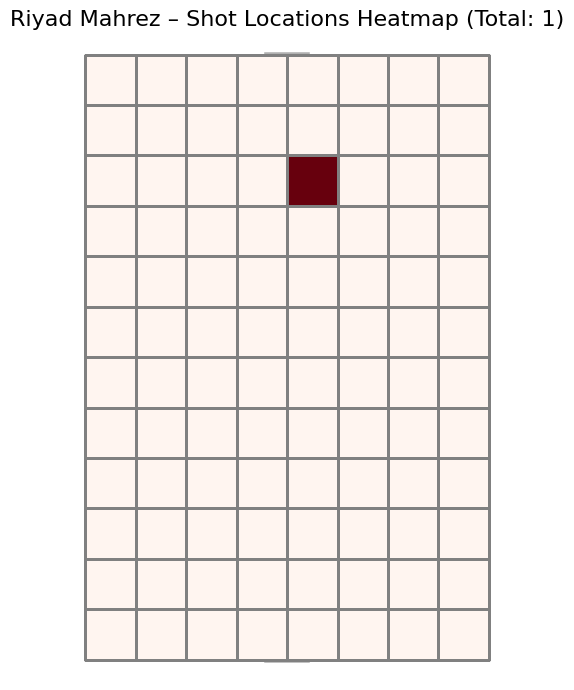

In [15]:
from mplsoccer import VerticalPitch
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your full events DataFrame
player = 'Jamie Vardy'

# 1. Filter shots
shots = events_df[(events_df['type'] == 'Shot') & (events_df['player'] == player)]

# 2. Extract coordinates
x = shots['x']
y = shots['y']

# 3. Create the pitch and bin the data
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(12, 8), normalize=False)

# 4. Plot
fig, ax = pitch.draw(figsize=(10, 7))
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolors='grey')
ax.set_title(f'{player} – Shot Locations Heatmap (Total: {len(shots)})', fontsize=16)
plt.show()

player = 'Riyad Mahrez'

# 1. Filter shots
shots = events_df[(events_df['type'] == 'Shot') & (events_df['player'] == player)]

# 2. Extract coordinates
x = shots['x']
y = shots['y']

# 3. Create the pitch and bin the data
pitch = VerticalPitch(pitch_type='statsbomb', half=False)
bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(12, 8), normalize=False)

# 4. Plot
fig, ax = pitch.draw(figsize=(10, 7))
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolors='grey')
ax.set_title(f'{player} – Shot Locations Heatmap (Total: {len(shots)})', fontsize=16)
plt.show()

In [16]:
#now try to do the same thing to create player heat maps
#based on an entire seasons worth of data. 
#and then use cosine similarity to evaluate these heatmaps!

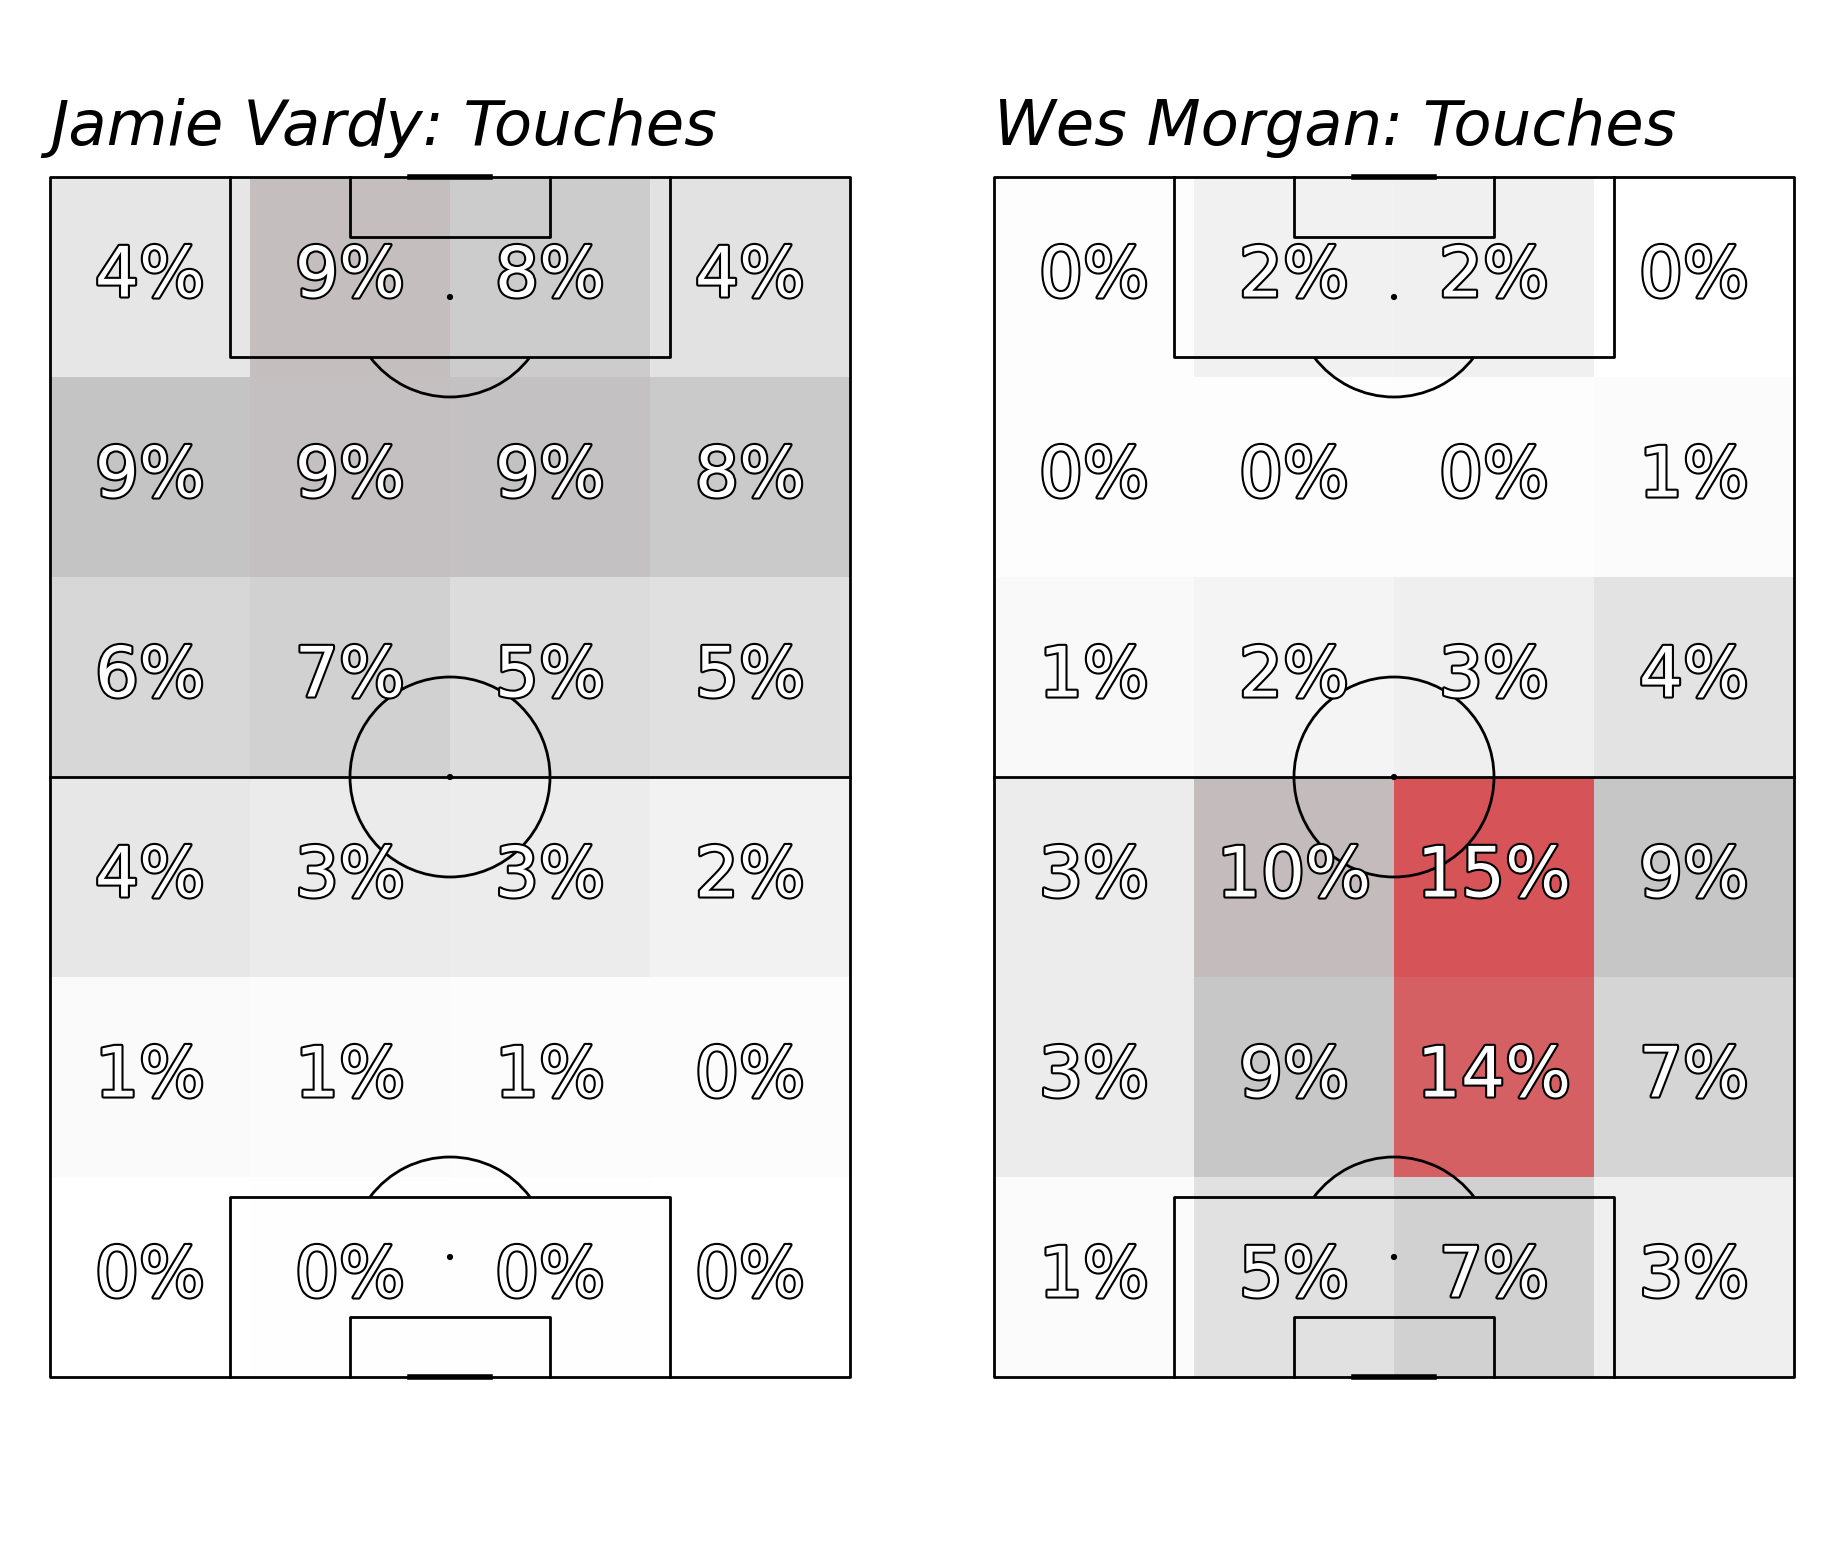

In [34]:
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)


path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05, axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

bin_statistic1 = np.zeros((4,6))
bin_statistic2 = np.zeros((4,6))


#loop over all matches throughout the entire season to retrieve full season heat maps:


for i in range(0, 38): 
    latest_match_id = matches_df.match_id.iloc[i]
    events_df = sb.events(match_id=latest_match_id)
    events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
    events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
    events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)
    events_df.pass_outcome.unique()
    f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]
    f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()
    f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)
    player1="Jamie Vardy"
    player2="Wes Morgan"
    touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block','Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']
    player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
    player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]
    f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]
    f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()
    bin_statistic1 += pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',bins=(6, 4),normalize=False)['statistic']
    bin_statistic2 += pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
                                         bins=(6, 4),normalize=False)['statistic']


bin_statistic1 = bin_statistic1 / bin_statistic1.sum()
bin_statistic2 = bin_statistic2 / bin_statistic2.sum()

reference_stat1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count', bins=(6,4), normalize=True)
reference_stat2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count', bins=(6,4), normalize=True)

    
data1 =     {'statistic': bin_statistic1,
                          'x_grid': reference_stat1['x_grid'],
                          'y_grid': reference_stat1['y_grid'], 
             'cx': reference_stat1['cx'], 'cy': reference_stat1['cy']}
data2 = {'statistic': bin_statistic2,
                          'x_grid': reference_stat2['x_grid'],
                          'y_grid': reference_stat2['y_grid'],
        'cx': reference_stat2['cx'], 'cy': reference_stat2['cy']}

heatmap1 = pitch.heatmap({'statistic': bin_statistic1,
                          'x_grid': reference_stat1['x_grid'],
                          'y_grid': reference_stat1['y_grid']},
                         ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

heatmap2 = pitch.heatmap({'statistic': bin_statistic2,
                          'x_grid': reference_stat2['x_grid'],
                          'y_grid': reference_stat2['y_grid']},
                         ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

vmax = max(bin_statistic1.max(), bin_statistic2.max())
vmin = 0
#heatmap1 = pitch.heatmap(heatmap1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(data1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
#heatmap2 = pitch.heatmap(heatmap2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(data2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

H1 = bin_statistic1.ravel().reshape(1, -1)
H2 = bin_statistic2.ravel().reshape(1, -1)

cos_sim = cosine_similarity(H1, H2)[0][0]
print(f'Cosine Similarity: {cos_sim:.3f}')

#cosine similarity measures the similarity of the shape of distribution
#so tells us something about playstyle really 
#do twomplayers that play similar positions take up similar positions?
#could be useful to evaluate player replacements 
#especially if looking not just at touches,
#but at things like where players take their shots during a season. 

Cosine Similarity: 0.303


<h2> Part 2: Analyzing Summer 2016 Transfers Using Cosine Similarity </h2>

To evaluate whether cosine similarity is a useful metric for predicting how well a player will fit into a new team, we will analyze real-life transfers from the summer of the 2016 season. While this method is admittedly simplistic, we aim to explore its potential by testing whether the similarity scores can meaningfully predict transfer outcomes.

We are focusing on two main cosine similarity measures:

<ol>
  <li><strong>Similarity to the replaced player</strong> – A high cosine similarity between the incoming player and the player they are replacing may suggest a good tactical fit, as teams often look for like-for-like replacements.</li>
  <li><strong>Dissimilarity with teammates</strong> – We hypothesize that a lower similarity with players in adjacent or complementary roles may be beneficial, as it could reduce role redundancy and allow for more balanced team dynamics.</li>
</ol>

This analysis will allow us to determine whether cosine similarity has potential as a predictive tool in evaluating player fit and transfer strategy.